<a href="https://colab.research.google.com/github/LeTrungDunggg/Assignment/blob/main/Cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import thư viện
import numpy as np #thư viện xử lý ma trận
from keras.utils import np_utils # thư viện xử lý chuyển class
from keras.datasets import cifar100 # gọi tập dataset động vật, máy bay 
from keras.callbacks import EarlyStopping
from keras.models import Sequential # hàm chạy mô hình
from keras.layers import Dense, Dropout # tạo mạng nơ ron
from tensorflow.keras.optimizers import RMSprop 
import matplotlib.pyplot as plt  # thư viện dùng để vẽ
from keras.backend import dropout

In [ ]:
from keras.datasets import cifar100
import matplotlib.pyplot as plt 
(x_train, y_train),(x_test,y_test) = cifar100.load_data()

169017344/169001437 [==============================] - 2s 0us/step


In [ ]:
x_train = x_train.reshape(50000,3072)
x_test = x_test.reshape(10000,3072)
# ép kiểu
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#chuẩn hóa dữ liệu
x_train /=255
x_test /=255
#chuyển y từ 1 class thành 10 class
y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)

In [ ]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(3072,)))
model.add(Dropout(0.1))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               51300     
                                                                 
Total params: 1,887,332
Trainable params: 1,887,332
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=128,epochs=500,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=100)])

Epoch 1/500
313/313 [==============================] - 14s 42ms/step - loss: 4.2876 - accuracy: 0.0518 - val_loss: 3.9514 - val_accuracy: 0.0963
Epoch 2/500
313/313 [==============================] - 13s 43ms/step - loss: 3.8934 - accuracy: 0.1019 - val_loss: 3.7674 - val_accuracy: 0.1175
Epoch 3/500
313/313 [==============================] - 14s 43ms/step - loss: 3.7392 - accuracy: 0.1260 - val_loss: 3.6567 - val_accuracy: 0.1466
Epoch 4/500
313/313 [==============================] - 13s 41ms/step - loss: 3.6338 - accuracy: 0.1447 - val_loss: 3.6453 - val_accuracy: 0.1535
Epoch 5/500
313/313 [==============================] - 13s 42ms/step - loss: 3.5595 - accuracy: 0.1608 - val_loss: 3.5830 - val_accuracy: 0.1592
Epoch 6/500
313/313 [==============================] - 13s 41ms/step - loss: 3.5003 - accuracy: 0.1717 - val_loss: 3.4544 - val_accuracy: 0.1895
Epoch 7/500
313/313 [==============================] - 13s 41ms/step - loss: 3.4433 - accuracy: 0.1822 - val_loss: 3.4449 - val_ac

Test_loss 3.9104199409484863
Test accuracy 0.164900004863739


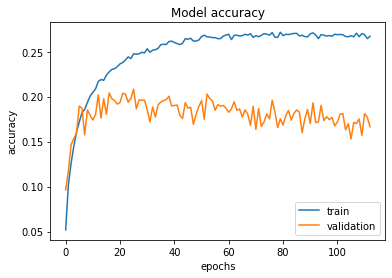

In [ ]:
score=model.evaluate(x_test,y_test,verbose=0)
print('Test_loss',score[0])
print('Test accuracy',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'])
plt.show()